In [1]:
using Plots, DelimitedFiles, RecipesBase
pyplot()

Plots.PyPlotBackend()

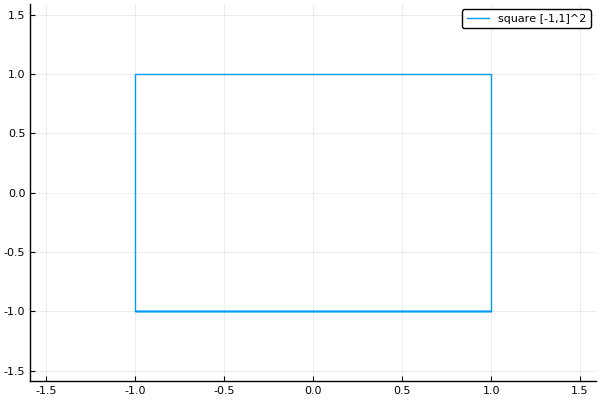

In [28]:
# Square shapefile 
xy = hcat(collect(LinRange(-1,1,20)),ones(20))
xy = vcat(xy,hcat(ones(20),collect(LinRange(1,-1,20))))
xy = vcat(xy,hcat(collect(LinRange(-1,1,20)),-ones(20)))
xy = vcat(xy,hcat(-ones(20),collect(LinRange(-1,1,20))))

writedlm("square.txt",xy)

q1 = plot(xy[:,1],xy[:,2], label="square [-1,1]^2",
          xlims=1.5*[-1,1],ylims=1.5*[-1,1])

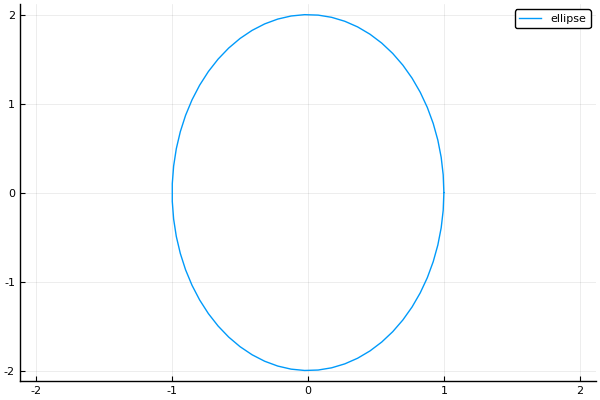

In [27]:
# simply connected shapefile - ellipse

function ellips(t, ax1, ax2)
    [cos(t)/ax1 sin(t)/ax2]
end

function ebdy(t,ax1,ax2)
    (cos(t)/ax1)^2 + (sin(t)/ax2)^2
end

t = LinRange(0,2,64)*pi
xy = vcat(ellips.(t,1.0,0.5)...)
writedlm("ellipse.txt",xy)

p1 = plot(xy[:,1],xy[:,2],label="ellipse",
          xlims=2*[-1,1],ylims=2*[-1,1])

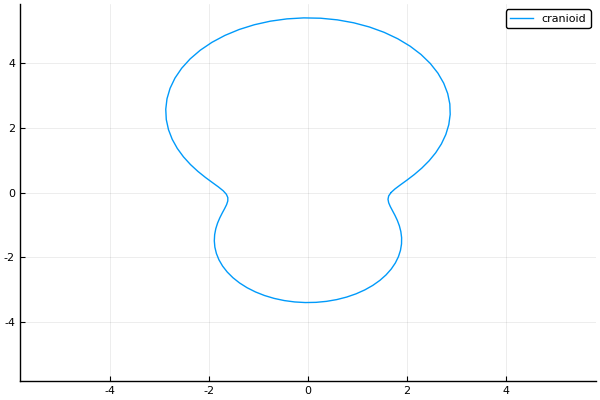

In [30]:

""" Function to plot 2d points that are in the form of nested arrays"""
@recipe function plt2dpts(pts::Array{Array{Float64,1},1})
    p = hcat(pts...)
    dims = size(p)
    legend = false
    @series begin
        p[1,:],p[2,:]
    end
end

# cranioid
p = 0.9
q = 0.8
a = 1.0
b = 2.2
c = 2.2
t = LinRange(0,2*pi,100)

cran(thet) = a*sin(thet)+b*sqrt(1-p*cos(thet)^2)+c*sqrt(1-q*cos(thet)^2)
r = cran.(t)

tocartesian(r,thet) = [r*cos(thet),r*sin(thet)]
bdy = tocartesian.(r,t)

writedlm("cranioid.txt",hcat(bdy...)')

p2 = plot(bdy,label="cranioid",
          xlims=5.5*[-1,1],ylims=5.5*[-1,1])

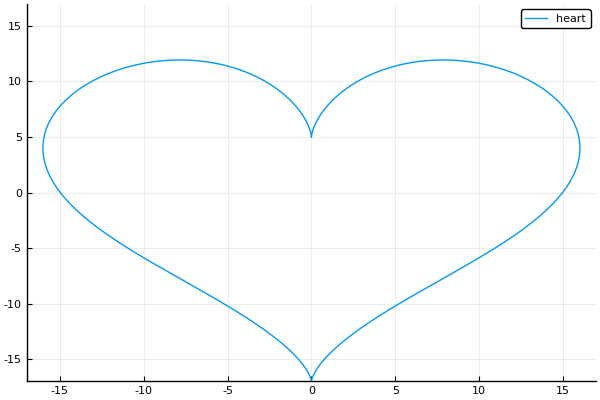

In [25]:
# heart shapefile

function heart(t)
    x = 16*sin(t)^3
    y = 13*cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t)
    return [x y]
end

# We are pretending this heart is the colorado plateaus
t = LinRange(0,2,1024)*pi
xy = vcat(heart.(t)...)

writedlm("heartshape.txt",xy)

r1 = plot(xy[:,1],xy[:,2],label="heart",
    xlims=[-16,16],ylims=[-16,16])


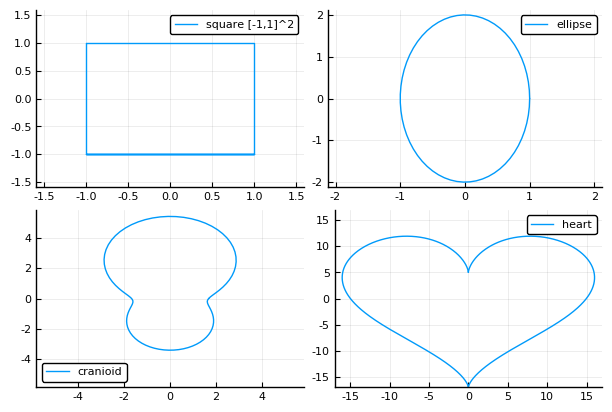

In [22]:
plot(q1,p1,p2,r1,layout=(2,2))
png("Shapefiles")